## Tutorial #2: Visualize EEG Data

EEG data contain rich information over multiple dimensions, in space (i.e. over electrodes distributed on the scalp) and time. It is crucial to be able to efficiently visualize this information, in order to get a first understanding of the type of responses and activity that our EEG data contain.

The main focus of this chapter is to provide an overview of visualization tools for eeg data. Various visualization strategies on an example dataset will be provided. For this aim, we will use custom functions, and also built-in code, provided by 'viz' module of the MNE package.

In [2]:
import mne

In [3]:
#Load epoched data
data_file = '../datasets/817_1_PDDys_ODDBALL_Clean_curated-epo'

# Read the EEG epochs:
epochs = mne.read_epochs(data_file + '.fif')

Reading ../../817_1_PDDys_ODDBALL_Clean_curated-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


Before any attempt to visualize data with MNE package, the mne.viz module should be imported.

In [5]:
import mne.viz

### 1.) Plotting time-courses of EEG activity

#### 1.1 Plotting single-trial epoched data

When visualizing any EEG dataset, the first step usually concerns a visual inspection of single-trial data. With this inspection we can go through all of the recorded epochs in order to evaluate the quality of our dataset. Our goal is to understand:
</br>

(a) are there any electrodes with excessive noise that should be interpolated?</br>

(b) are there excessive eye blinks that need to be removed?</br>

(c) which epochs are noisy and we need to exclude from further analysis?</br>

The simplest way to do a visual inspection of an EEG dataset is by using the plot() MNE function, which plots epochs as its name indicates. The y axis shows the channel names while the x axis is showing the epoch numbers. Additionally above the plot, we can see the ratio of each event type. 

For example, in the dataset that we are using the ratio of Standard epochs is 0.69, Target 0.15 and Novel 0.16:

Percentage of Standard events :  0.69
Percentage of Target events :  0.15
Percentage of Novel events :  0.16


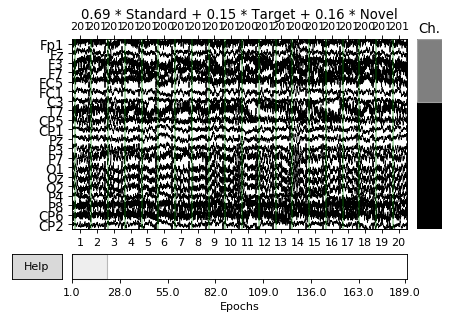

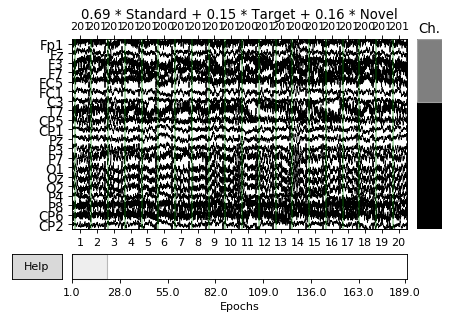

In [16]:
import numpy as np
print('Percentage of Standard events : ', np.around(len(epochs['Standard'])/len(epochs), decimals=2))
print('Percentage of Target events : ',np.around(len(epochs['Target'])/len(epochs), decimals=2))
print('Percentage of Novel events : ', np.around(len(epochs['Novel'])/len(epochs), decimals=2))
epochs.plot()

The .plot() function can be also used in an interactive mode, through the magic:

%matplotlib tk

It then allows the user to scrol through epochs and electrodes and click on the ones that need to be excluded.

#### 1.2. Plotting average epochs

Single-trial epoch data are usually very noisy. One way of overcoming this drawback is by averaging data over many epoch repetitions, and focusing on average epoch responses, the so-called average Event-Related Potentials, or ERPs.

This technique has been widely used in the field of EEG research, as it allows eliminating responses that are irrelevant to a given task. Indeed, average ERPs only contain activity that appears at consistent latencies and electrode locations across repetitions.

A typical image of an average ERP response will show 'low' activity during the baseline i.e. before a stimulus occurs. This is often then followed by large positive or negative deflections of EEG signals during the post-stimulus period, reflecting the average response to an external stimulus.

In the following example, we can see the average ERP in response to standard sounds, plotted by overlaying all electrodes across time:

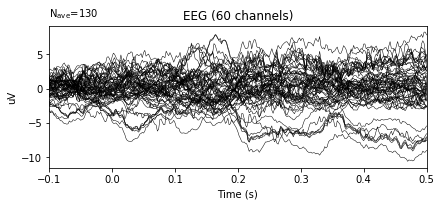

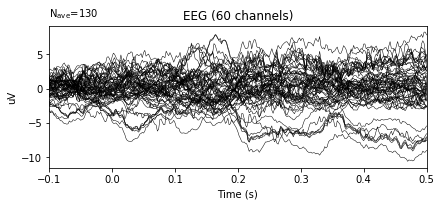

In [11]:
epochs['Standard'].average().plot()

Average ERP data can be plotted via the matplotlib library too. In the following example, the average ERP of the three experimental condition at channel 18 is provided.

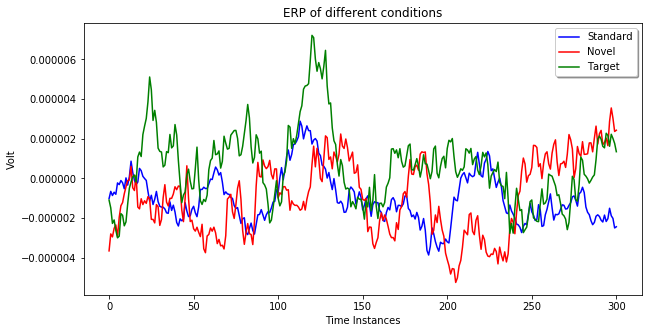

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

st = epochs['Standard']
nv = epochs['Novel']
tg = epochs['Target']
ch = 18
conditions = ['Standard', 'Novel', 'Target']

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Time Instances')
ax.set_ylabel('Volt')

ax.plot(st.average().data[ch, :], color='blue', label='Standard')
ax.plot(nv.average().data[ch, :], color='red', label='Novel')
ax.plot(tg.average().data[ch, :], color='green', label='Target')

legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
plt.title('ERP of different conditions')
plt.show()



#### 1.3 Plotting topographic information

Apart from time-courses of activity, another way to visualize EEG data is as voltage topographies. Topographies display the EEG voltage values at each channel on the scalp. They are similar to a heat map where different voltage ranges are represented with different colors. 

Topographies allow us to inspect at once the distribution of voltage values on the scalp. This is particularly advantageous, as they can be informative of all electrodes at once, and not just at single ERP components.


The easiest way to plot topographies is through MNE, which has an evoked class function named plot_topomap(). This function takes a time range and type of the channels as parameters and it plots the a topographic map with given data. On the right side of the plot, a color map is provided to undertand the volt ranges that each color represents. Dots on the scalp figures show the location of electrodes.

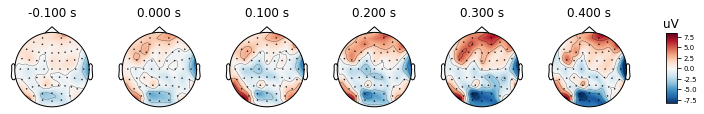

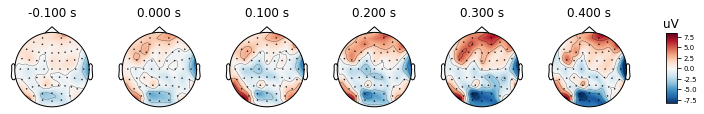

In [18]:
import numpy as np 
%matplotlib inline
times = np.arange(-0.1, 0.5, 0.1)
epochs.average().plot_topomap(times, ch_type='eeg')

### 2.) Baseline Correction

As EEG is a time-resolving signal, it may often have temporal drifts which are unrelated to our experimental question. Various internal and external sources may cause temporal drifts, which change over time, and also across electrodes. 

To reduce the effect of such drifts, it is custom to perform a so-called *baseline correction*. Essentially, this consists of using EEG activity over a baseline period, i.e. before an external event occurs, to correct activity over a post-stimulus interval, i.e. the time after an external event occurs. 

Various approaches exist for baseline correction. The traditional way is subtracting the mean of a baseline period from every time point of the baseline and post-stimulus interval. In other words, the average voltage values of each electrode are calculated within a time interval and then this average is substracted from that time interval of the signal.

#### Baseline Correction In Practice:
To apply baseline correction in MNE, a time interval should be passed as a paramenter to apply_baseline() function of epochs object. If 'None' is given as time interval, baseline correction will not be applied. To apply baseline correction to the all time interval, (None,None) should be used. This function returns baseline-corrected epochs object and note that it modifies the the object as well. 

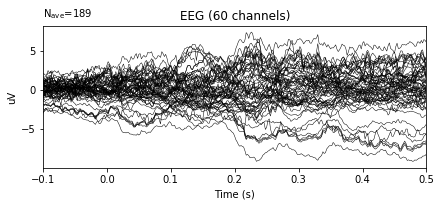

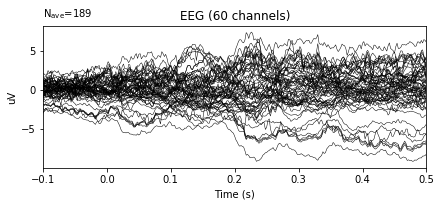

In [32]:
# Plot of initial evoked object
epochs.average().plot()

As mentioned before, the initial signal will be modified by baseline correction. If you want to keep the initial epoch object without any change it should be copied to another variable before calling apply_baseline() function. Otherwise it will be lost. In python, shallow copies can be modified when the original object is modified. However, deep copies are independent from the original object. So, in our case we need a deep copy of epochs object.

Applying baseline correction (mode: mean)


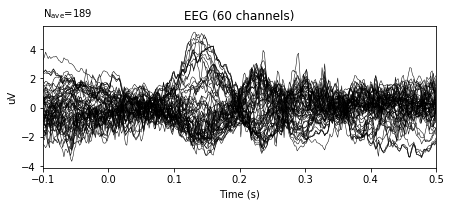

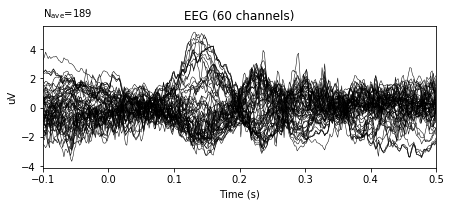

In [33]:
import copy
epochs_wo_bc = copy.deepcopy(epochs)
# baseline correction
bc_epochs = epochs.apply_baseline((None,None))

# Plot of baseline-corrected evoked signal
bc_epochs.average().plot()

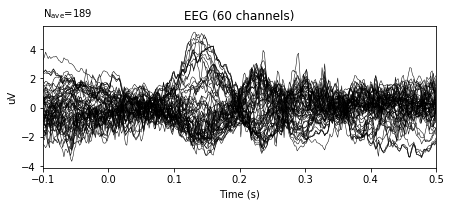

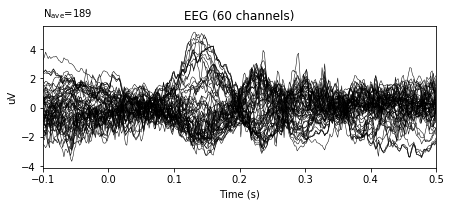

In [34]:
#Modified evoked object
epochs.average().plot()

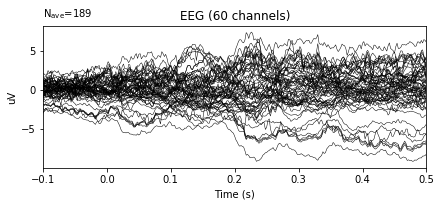

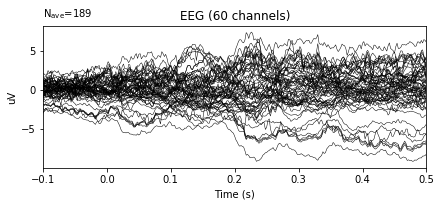

In [41]:
epochs_wo_bc.average().plot()

In the example above, the variance in the amplitudes of given signal decreased significantly.  

Alternatively a similar observation can be made via plots that show single trials and the average as in the plots below. In these plots black line represents the average and the rest is single trials. 

Note that these plots are drawn by using Matplotlib library of Python.

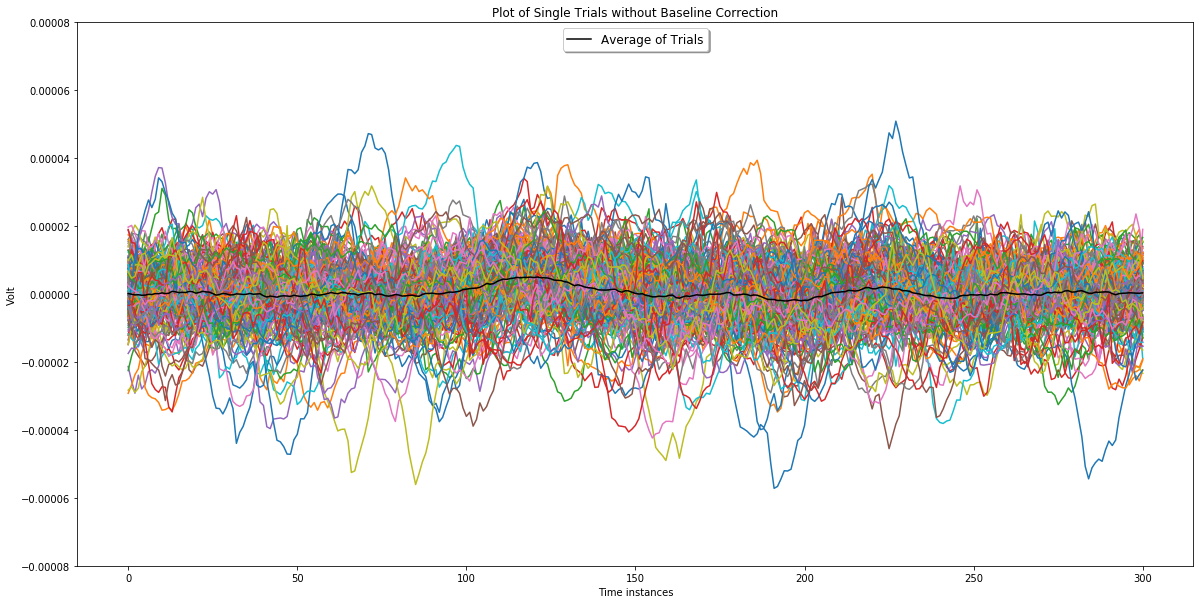

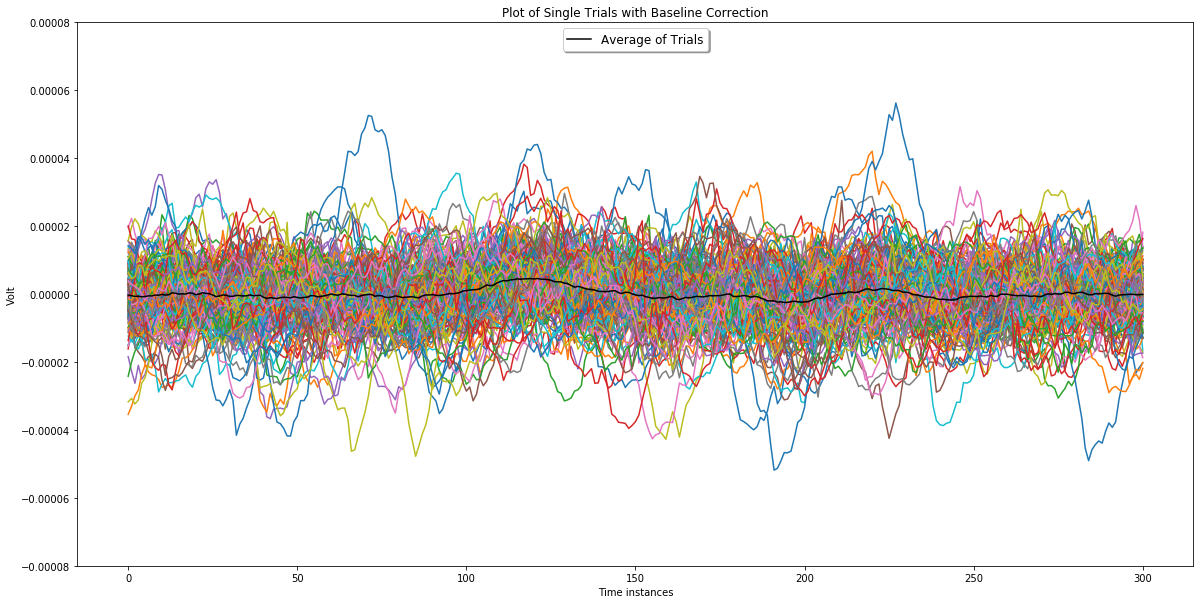

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline
ch = 47 # channel index
data_types = ['original', 'bc']

for i in range(len(data_types)):

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xlabel('Time instances')
    ax.set_ylabel('Volt')
    plt.ylim(-0.00008, 0.00008) 
    if data_types[i] == 'bc': 
        plt.title('Plot of Single Trials with Baseline Correction')
        for i in range(len(bc_epochs.get_data())):   
            ax.plot(bc_epochs.get_data()[i,ch,:])
        ax.plot(bc_epochs.average().data[ch,:], color='black', label='Average of Trials')
    
    else:
        plt.title('Plot of Single Trials without Baseline Correction')
        for i in range(len(epochs_wo_bc.get_data())):   
            ax.plot(epochs_wo_bc.get_data()[i,ch,:])
        ax.plot(epochs_wo_bc.average().data[ch,:], color='black', label='Average of Trials')

    legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
    plt.show()

In the above plot, the effect of baseline correction seems to have not significant but if you have a closer look  the variance in amplitudes are decreased. The reason for not having an obvious change is that the ERP which is the mean of epoches is not very strong. If we have a stronger ERP signal, then difference between two plots would be clearer.